In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Mukundan_Data/Kaggle/learning_project/titanic/train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Age'].median()

28.0

In [6]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

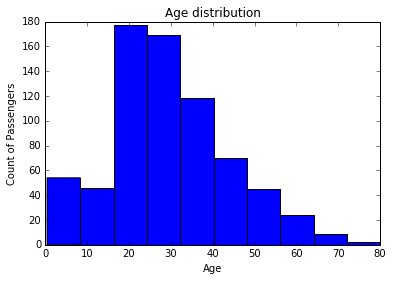

In [24]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.pyplot.title('Age distribution')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

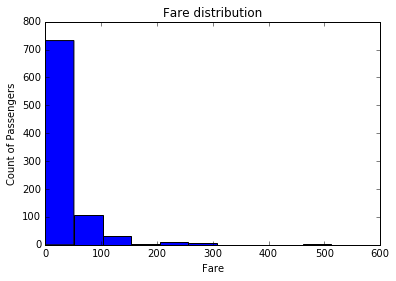

In [25]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.pyplot.title('Fare distribution')
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()

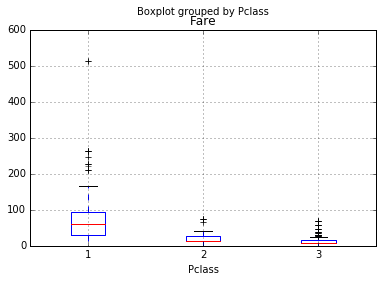

In [26]:
df.boxplot(column = 'Fare',by ='Pclass')

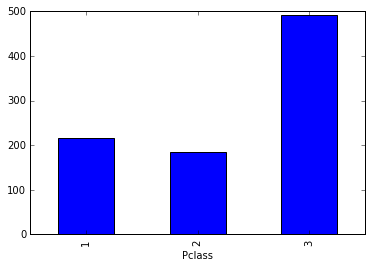

In [27]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

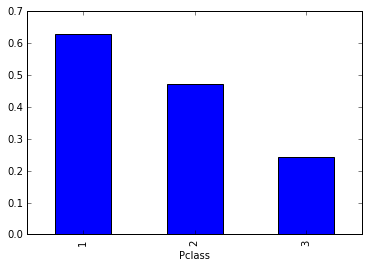

In [28]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

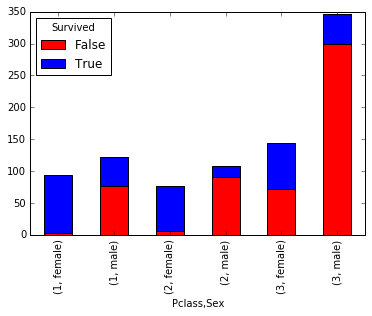

In [29]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

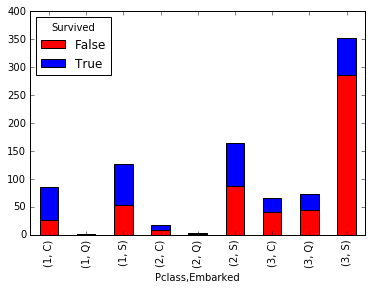

In [31]:
temp4 = pd.crosstab([df.Pclass,df.Embarked],df.Survived.astype(bool))
temp4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

In [35]:
sum(df['Cabin'].isnull())

687

In [36]:
sum(df['Ticket'].isnull())

0

In [38]:
df=df.drop(['Ticket','Cabin'],axis=1)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,8.0500,S


In [48]:
meanage = np.mean(df.Age)
df.Age = df.Age.fillna(meanage)

In [65]:
def name_extract(word):
 return word.split(',')[1].split('.')[0].strip()

In [66]:
df2 = pd.DataFrame({'Salutation':df['Name'].apply(name_extract)})

In [61]:
df = pd.merge(df, df2, left_index = True, right_index = True) # merges on index
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation_x,Salutation_y,Salutation_x,Salutation_y,Salutation_x,Salutation_y,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,Mr,Mr,Mr,Mr,Mr,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C,Mrs,Mrs,Mrs,Mrs,Mrs,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,7.9250,S,Miss,Miss,Miss,Miss,Miss,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,53.1000,S,Mrs,Mrs,Mrs,Mrs,Mrs,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,8.0500,S,Mr,Mr,Mr,Mr,Mr,Mr,Mr


In [63]:
df=df.drop(['Salutation_x','Salutation_y','Salutation_x','Salutation_y','Salutation_x','Salutation_y','Salutation'],axis=1)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,8.0500,S
